<font size=6  color= 'white' > <b>[LEPL1507] - PROJET P4</b> <br>
<br><br>
Airson Alexis<br>
Beniffou Ibrahim <br>
Henneaux Lucas <br>
Lemaire Antoine <br>
Smith Marielle <br>
Canon Théo<br>
<div style="text-align: right"> </div>

<br><br>
</font>


In [69]:
# Import 

# We strongly recommend you to check that you have the last version of each of these packages 

from numpy import zeros, arange, array, asarray, concatenate, where, empty, meshgrid, sqrt, float32, multiply, uint8, argmax, pi, max
from numpy.random import normal

from matplotlib.pyplot import subplots, title, xticks, legend, show, figure, plot, xlabel, ylabel, subplot, tight_layout
from matplotlib.pyplot import imshow as plt_imshow 

from os import listdir, walk, makedirs, system
from os.path import realpath, exists, isdir, join, isfile

from PIL.Image import open as pil_open

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from imutils import grab_contours

from builtins import max as MAX 

from csv import DictWriter, DictReader 

from cv2 import cvtColor, resize, GaussianBlur, applyColorMap, addWeighted, imwrite, imshow, imread, waitKey, medianBlur, inRange, bitwise_or, bitwise_and, approxPolyDP, isContourConvex, minEnclosingCircle
from cv2 import findContours, boundingRect, contourArea, convexHull, arcLength, Canny

from cv2 import COLOR_RGB2GRAY, COLOR_RGB2BGR, COLOR_GRAY2RGB, COLOR_BGR2RGB, COLORMAP_JET, COLOR_BGR2HSV, RETR_EXTERNAL, CHAIN_APPROX_SIMPLE, COLOR_BGR2GRAY, RETR_TREE

from random import randint

from copy import deepcopy 

from keras.preprocessing.image import ImageDataGenerator

from warnings import filterwarnings

import pydotplus # for the graphs of tensorboard 
import graphviz

from datetime import datetime
from packaging import version

from scipy.ndimage import gaussian_filter

from keras import Sequential
from keras.layers import RandomZoom, RandomRotation, RandomCrop, RandomContrast, RandomBrightness, Conv2D, MaxPool2D, Dense, Flatten, Dropout, ReLU
from keras.utils import to_categorical
from keras.callbacks import Callback, TensorBoard
from keras.backend import gradients, variable, sum, square, pow, switch, cast, relu, floatx, greater
from keras.utils.vis_utils import plot_model

from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize

from tensorflow import convert_to_tensor, GradientTape, get_logger, __version__
from tensorflow import argmax as tf_argmax 
from tensorflow.keras.callbacks import EarlyStopping


<font size=6  color= 'white' > <b> Phase 1 : retrieving data </b> <br>

The aim of this first part is to get arrays of images for convenience 

In [2]:
# defines variables 

#-----------------------------------------------------------------------------

# Those are the path to the images 

path_training = 'BelgiumTSC_Training\Training'
path_testing = 'BelgiumTSC_Testing\Testing'

nbr_class = 62 # len(next(walk(path_training))[1])  counting the number of classes 
print('number of classes : ', nbr_class)

#-----------------------------------------------------------------------------

# resol is the format for the images that we want for convenience

resol = 64 # Square image only ! 
print("Resolution of images : ", resol)

number of classes :  62
Resolution of images :  64


In [3]:
def accessing (path, resol) : 

    # retrieving the number of images to be treated in the folder
    # returns an iterator 

    DIR = path
    counter = 0
    for root, dirs, files in walk(DIR) :
        for file in files:    
            if file.endswith('.ppm') or file.endswith('.jpeg') or file.endswith('.jp2'):
                counter += 1

    print("number of images in the folder : ", counter)

    # Creating an image.DirectoryIterator to work over the images of the folder  

    datagen = ImageDataGenerator( rescale =1./255)
    set = datagen.flow_from_directory(path,target_size = (resol,resol),
    batch_size = counter,class_mode = 'binary', color_mode='rgb')

    return set

#-----------------------------------------------------------------------------

training_set = accessing(path_training, resol)
test_set = accessing(path_testing, resol) 

number of images in the folder :  4575
Found 4575 images belonging to 62 classes.
number of images in the folder :  2520
Found 2520 images belonging to 62 classes.


In [4]:
def store (iter) : 

    # Storing all the information in arrays for convenience 
    # returns arrays 

    X_iter , y_iter = iter.next()

    print("Shape of X_array : ", X_iter.shape)
    print("Shape of y_array : ", y_iter.shape)

    return X_iter, y_iter

#-----------------------------------------------------------------------------

X_train, y_train = store(training_set) 
X_test, y_test = store(test_set) 


Shape of X_array :  (4575, 64, 64, 3)
Shape of y_array :  (4575,)
Shape of X_array :  (2520, 64, 64, 3)
Shape of y_array :  (2520,)


In [5]:
# We combine the 2 sets because we will split in train and test sets by ourselves with shuffling 

X_train, X_test, y_train, y_test = train_test_split(concatenate((X_train, X_test)), concatenate((y_train, y_test)), test_size=0.25, shuffle=True, random_state=1)

print("Shape of final X_train : ", X_train.shape)
print("Shape of final y_train : ", y_train.shape)

print("Shape of final X_test : ", X_test.shape)
print("Shape of final y_test : ", y_test.shape)

Shape of final X_train :  (5321, 64, 64, 3)
Shape of final y_train :  (5321,)
Shape of final X_test :  (1774, 64, 64, 3)
Shape of final y_test :  (1774,)


<font size=6  color= 'white' > <b> Phase 2 : visualisation of the dataset </b> <br>

The aim of this part is to visualise the initial datasets 

In [7]:
# first, we want to visualize the images in our original sets 

def to_jpeg (folder_dir, dest) : 

    # Here is a code to save all ppm in the folder_dir in jpeg format in a directory : dest (must be created)

    for image in listdir(folder_dir):
        # check if the image ends with ppm
        if (image.endswith(".ppm")):
            img = pil_open(join(folder_dir,image))
            output_path = join(dest, image.replace('.ppm', '.jpg'))
            img.save(output_path, format = 'JPEG')
            

#-----------------------------------------------------------------------------

for dir in listdir(path_training) : 

    if (isdir(realpath(join(path_training, dir)))) : # This filters the Readme 

        if not exists (join("visu/Training/", dir)) : # If the folder doesn't exist, we create it 
            makedirs(join("visu/Training/", dir))

        to_jpeg(realpath(join(path_training, dir)), join("visu/Training/", dir)) # We put all the images in jpeg in it 

#-----------------------------------------------------------------------------

for dir in listdir(path_testing) : 

    if (isdir(realpath(join(path_training, dir)))) : # This filters the Readme 

        if not exists (join("visu/Testing/", dir)) : # If the folder doesn't exist, we create it 
            makedirs(join("visu/Testing/", dir))

        to_jpeg(realpath(join(path_training, dir)), join("visu/Testing/", dir)) # We put all the images in jpeg in it 

print("done ^^")

done ^^


In [8]:
def number (nbr_class, y, name) :     

    # Print the number of signs of each type in the sets

    nbr = zeros(nbr_class, dtype=int)

    for i in range(nbr_class) :
        nbr[i] = int((y.copy() == i).sum())  # Number of images of class i in the set 

    print("Number of each sign in the set : " + name)
    print()
    print(nbr)
    print()
    print("Total of signs : ", nbr.sum())
    print()

    return nbr

#-----------------------------------------------------------------------------

initial_nbr_train = number(nbr_class, y_train, 'y_train')
initial_nbr_test = number(nbr_class, y_test, 'y_test')

Number of each sign in the set : y_train

[ 16  96  12  14  22  12  20 180  29  14  40   5  16 105  43   5  15 202
 135 286  36  67 320  27  50  32   1  22 140  42  56 110 568  11  39 157
  11  98 369 224 232 122  35  27  40 122  35 136  10  11  11  24  16 163
 122  20  96  86  15  44  12 295]

Total of signs :  5321

Number of each sign in the set : y_test

[  5  41   8   7   5   2   4  67  10   4   9   2   5  24  15   4   6  60
  68 108   9  21 116   3  11  13   5   5  36  19  18  39 170   1  16  57
   7  31 129  71  58  37   9   9  11  36  15  42   1   4   4   6  11  60
  44   7  32  33   9  15   8  92]

Total of signs :  1774



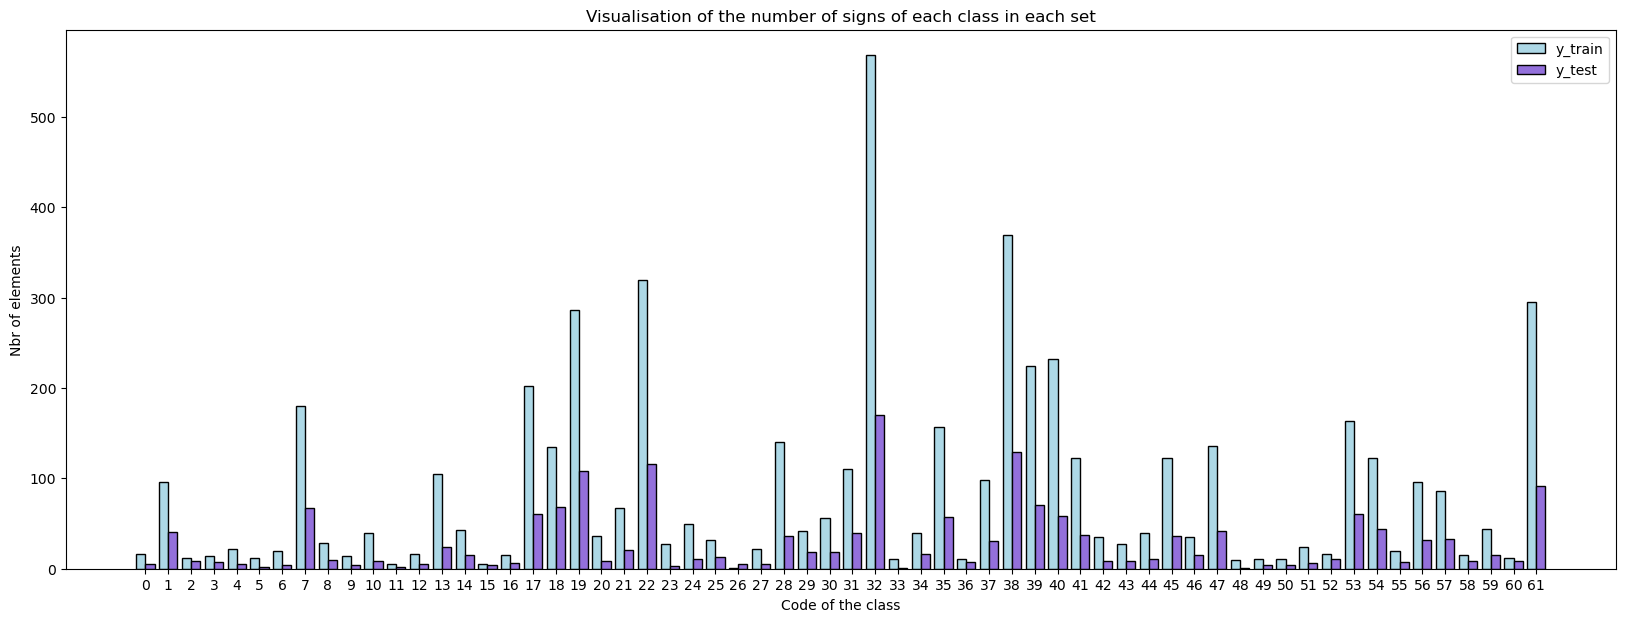

In [9]:
def graphs (nbr_class, set_1, set_2, name_1, name_2) : 

    # We plot an histo showing how many signs of each class we have in each set 

    fig, ax = subplots(figsize = (20, 7))
    bins = [x + 0.5 for x in range(-1, nbr_class)]
    ax.hist([set_1, set_2], range = (0, nbr_class - 1), bins=bins, edgecolor = 'black', color = ['lightblue', 'mediumpurple'], label = [name_1, name_2])
    title("Visualisation of the number of signs of each class in each set")
    xticks(arange(nbr_class))
    xlabel("Code of the class")
    ylabel("Nbr of elements")
    legend()
    show()

#-----------------------------------------------------------------------------

graphs(nbr_class, y_train, y_test, 'y_train', 'y_test')

<font size=6  color= 'white' > <b> Phase 3 : augmentation of the dataset </b> <br>

The aim of this part is to change the sizes of the initial datasets with some modification of image 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


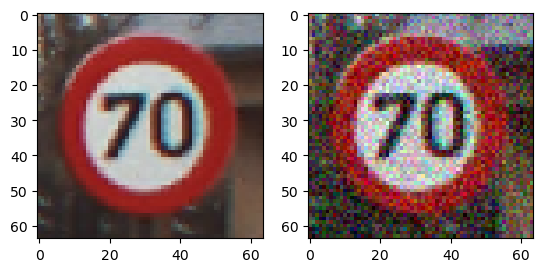

In [10]:
def noise (img, mean, var) : 

    # This fct applies random (normal) noise on an image 

    row,col,ch= img.shape

    sigma = var**0.5

    gauss = normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noise = img + gauss   

    return noise 

#-----------------------------------------------------------------------------

# A little visualisation of the noise 

# Here are the parameters for the normal noise we'll apply on image 
mean = 0
var = 0.01

Noise = zeros(X_train.shape)

for i in range (len(X_train)) : 
    Noise[i] = noise(deepcopy(X_train[i]), mean, var)

idx = randint(0,len(X_train))

figure()
subplot(121)
plt_imshow(X_train[idx])
subplot(122)
plt_imshow(Noise[idx])


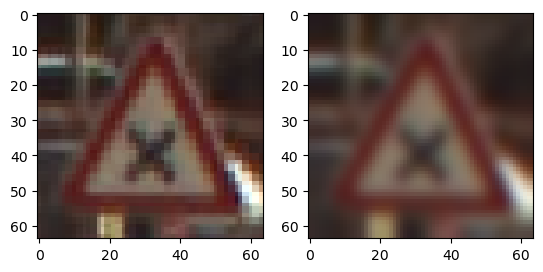

In [11]:
def blur (img, resol, sigma) : 

    # This fct applies blur on an image by applying GaussianBlur 

    blur = GaussianBlur(img,(resol+1,resol+1), sigma)

    return blur 

#-----------------------------------------------------------------------------

# A little visualisation of the blur 

# Here are the parameters for variation of intensity on pixels 
sigma = 1.5 

Blur = zeros(X_train.shape)

for i in range (len(X_train)) : 
    Blur[i] = blur(deepcopy(X_train[i]), resol, sigma)

idx = randint(0,len(X_train))

figure()
subplot(121)
plt_imshow(X_train[idx])
subplot(122)
plt_imshow(Blur[idx])

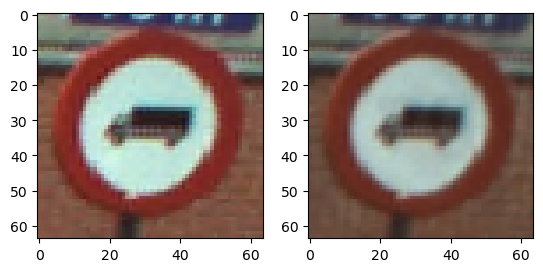

In [12]:
# Applying gaussian filter 

filter = gaussian_filter(deepcopy(X_train), 0.5)

# A little visualisation of the filter 

idx = randint(0,len(X_train))

figure()
subplot(121)
plt_imshow(X_train[idx])
subplot(122)
plt_imshow(filter[idx])

In [13]:
# Here's another model of augmentation using keras 

get_logger().setLevel('ERROR')

data_augmentation = Sequential() 

data_augmentation.add(RandomRotation((-0.05, 0.05)))
data_augmentation.add(RandomZoom(height_factor=(-0.3, -0.2),width_factor=(-0.3, -0.2)))
data_augmentation.add(RandomCrop(height=resol,width=resol))
data_augmentation.add(RandomBrightness((-0.2,0.5), value_range=(0.0, 1.0)))
data_augmentation.add(RandomContrast((0.0,5.0)))

#-----------------------------------------------------------------------------

augmentation_noise_blur = Sequential()

augmentation_noise_blur.add(RandomRotation((-0.05, 0.05)))
augmentation_noise_blur.add(RandomZoom(height_factor=(-0.3, -0.2),width_factor=(-0.3, -0.2)))
augmentation_noise_blur.add(RandomCrop(height=resol,width=resol))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


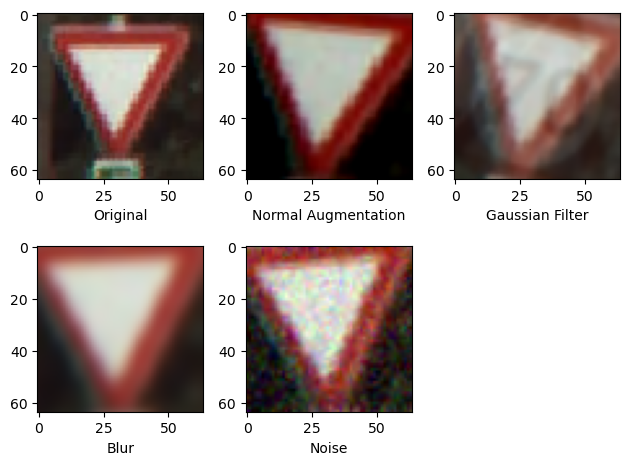

In [14]:
idx = randint(0,len(X_train))

# A visualisation of what we'll see in the augmented dataset 

figure()
subplot(231)
plt_imshow(X_train[idx])
xlabel("Original")
subplot(232)
plt_imshow(data_augmentation(X_train[idx]))
xlabel("Normal Augmentation")
subplot(233)
plt_imshow(augmentation_noise_blur(filter[idx]))
xlabel("Gaussian Filter")
subplot(234)
plt_imshow(augmentation_noise_blur(Blur[idx]))
xlabel("Blur")
subplot(235)
plt_imshow(augmentation_noise_blur(Noise[idx]))
xlabel("Noise")

tight_layout()

In [15]:
# Let's now create artificial images from the ones we already have with some previous modifications 

# We define a limit of sign of each type that we want in our augmented dataset 
# And we'll count the number of elements that we must add 

#-----------------------------------------------------------------------------

lim = max(initial_nbr_train) - 100

aug = zeros(nbr_class, dtype=int)
counter = 0

for i in range(nbr_class) :

    if initial_nbr_train[i] >= lim : continue # This means that we have a well represented class, so nothing must be done 
    
    aug[i] = int(3/4*(lim - initial_nbr_train[i])) # To respect a certain "proportionnality", we add only 3/4 of the difference to the limit 
    counter += aug[i]

#-----------------------------------------------------------------------------

# Creating new sets 

X_train_new = zeros((len(X_train) + counter, resol, resol, 3))
y_train_new = zeros(len(y_train) + counter)
X_train_new[:len(X_train)] = X_train
y_train_new[:len(y_train)] = y_train

#-----------------------------------------------------------------------------

index = len(X_train)

# Here we recompute the noise, historical reason 
# This has been kept to avoid errors 

noise = zeros(X_train.shape)
row,col,ch= X_train[0].shape
mean = 0
var = 0.05
sigma = var**0.5

#-----------------------------------------------------------------------------

# aug[i] is the number of sign of this class to add 

# (1/3) images in the set with noise on it 
# (1/3) images in the set with blur on it
# (1/3) images in the set with the augmentation with keras 

# Each augmented image is created from a random image in the initial set 

for i in range(nbr_class) :

    indices = where(y_train == i)
        
    # NORMAL AUGMENTATION
    for j in range(int(aug[i]/3)) :
        idx = randint(0, len(indices[0])-1)
        augmented_image = data_augmentation(X_train[indices[0][idx]])
        X_train_new[index] = augmented_image
        y_train_new[index] = i
        index += 1
    
    # NOISE
    for j in range(int(aug[i]/3)) :
        idx = randint(0, len(indices[0])-1)
        gauss = normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        augmented_image = X_train[indices[0][idx]] + gauss
        X_train_new[index] = augmentation_noise_blur(augmented_image)
        y_train_new[index] = i
        index += 1
    
    # BLUR
    for j in range(aug[i] - int(2*aug[i]/3)) :
        idx = randint(0, len(indices[0])-1)
        augmented_image = GaussianBlur(X_train[indices[0][idx]],(resol+1,resol+1),1.5)
        X_train_new[index] = augmentation_noise_blur(augmented_image)
        y_train_new[index] = i
        index += 1

Number of each sign in the set : y_train

[362 375 354 354 356 354 356 396 357 354 361 351 355 376 361 351 354 401
 384 422 360 367 431 357 363 359 350 356 386 361 365 378 568 353 360 389
 353 375 442 407 409 381 359 357 361 381 359 385 353 353 353 357 355 391
 381 356 375 372 354 362 354 424]

Total of signs :  23146



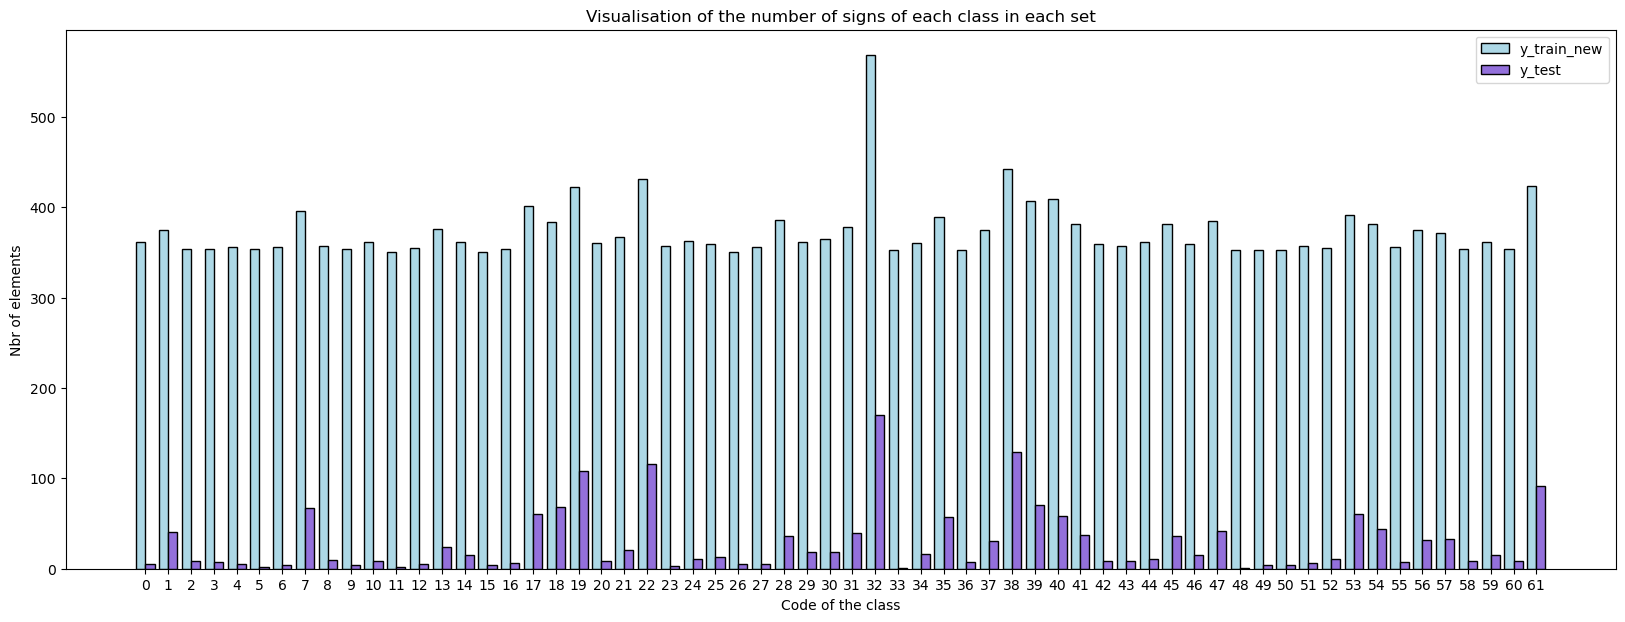

In [16]:
# Visualisation of the augmented dataset 

nbr_train = number(nbr_class, y_train_new, 'y_train')
graphs(nbr_class, y_train_new, y_test, 'y_train_new', 'y_test')

In [17]:
# Erasing part of the picture to avoid overfitting 
# We'll draw black rectangle randomly on the images to avoid overfitting 
# But we don't do it on the center of the pictures !  

X_train_new_erase = empty(X_train_new.shape)

for i in range(X_train_new.shape[0]):
    
    aug_img = X_train_new[i]
    new_img = array(aug_img)
    yes_or_no = randint(0, 9)                  # this will decide if we erase or not

    if yes_or_no < 5:                                 # 50% chance of erasing
        random_size = randint(0, 3)            # this will decide the size of the patch
        if random_size == 0:
            x_place = randint(0, resol-7)      # we want to erase a 7x15 rectangle
            y_place = randint(0, resol-15)
            for k in range(x_place, x_place+7):
                for j in range(y_place, y_place+15):
                    if (12 <= k <= 18 and 12 <= j <= 18):
                        continue
                    new_img[k, j, 0] = 0
                    new_img[k, j, 1] = 0
                    new_img[k, j, 2] = 0
                    
        elif random_size == 1:
            x_place = randint(0, resol-5)      # we want to erase a 5x10 rectangle
            y_place = randint(0, resol-10)
            for k in range(x_place, x_place+5):
                for j in range(y_place, y_place+10):
                    if (12 <= k <= 18 and 12 <= j <= 18):
                        continue
                    new_img[k, j, 0] = 0
                    new_img[k, j, 1] = 0
                    new_img[k, j, 2] = 0

        elif random_size == 2:
            x_place = randint(0, resol-15)     # we want to erase a 15x7 rectangle
            y_place = randint(0, resol-7)
            for k in range(x_place, x_place+15):
                for j in range(y_place, y_place+7):
                    if (12 <= k <= 18 and 12 <= j <= 18):
                        continue
                    new_img[k, j, 0] = 0
                    new_img[k, j, 1] = 0
                    new_img[k, j, 2] = 0
        else:
            x_place = randint(0, resol-10)     # we want to erase a 10x5 rectangle
            y_place = randint(0, resol-5)
            for k in range(x_place, x_place+10):
                for j in range(y_place, y_place+5):
                    if (12 <= k <= 18 and 12 <= j <= 18):
                        continue
                    new_img[k, j, 0] = 0
                    new_img[k, j, 1] = 0
                    new_img[k, j, 2] = 0

    X_train_new_erase[i] = new_img

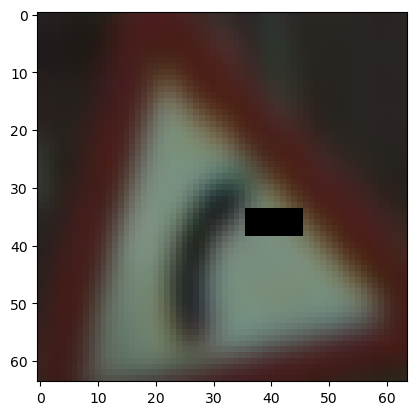

In [19]:
idx = randint(0,len(X_train_new_erase))

figure()
plt_imshow(X_train_new_erase[idx])

<font size=6  color= 'white' > <b> Phase 4 : Construction of the model </b> <br>

The aim of this part is to construct a model using CNN

In [20]:
# This is just a change of dimension for the model

y_train_tc = to_categorical(y_train_new, nbr_class)
y_test_tc = to_categorical(y_test, nbr_class)

print("initial shape of y_train : ", y_train_new.shape)
print("After categorical : ", y_train_tc.shape)

print("initial shape of y_test : ", y_test.shape)
print("After categorical : ", y_test_tc.shape)

initial shape of y_train :  (23146,)
After categorical :  (23146, 62)
initial shape of y_test :  (1774,)
After categorical :  (1774, 62)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 18, 18, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 18, 18, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                      

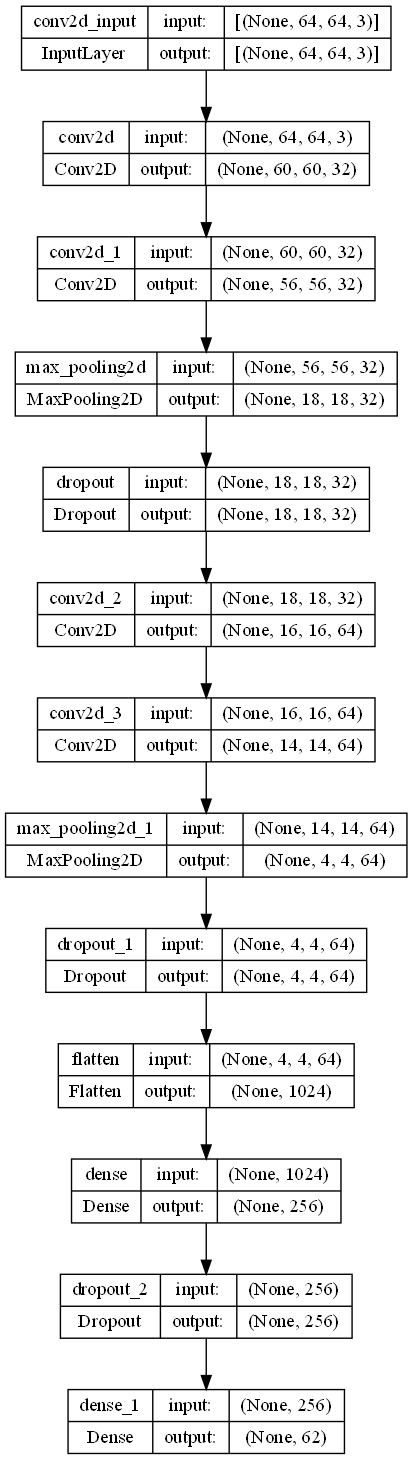

In [21]:
# Here's the model defined with keras 

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(resol,resol,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(nbr_class, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model 
model.summary()
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True, rankdir = 'TB', dpi=100)

1/1 [==============================] - 0s 76ms/step


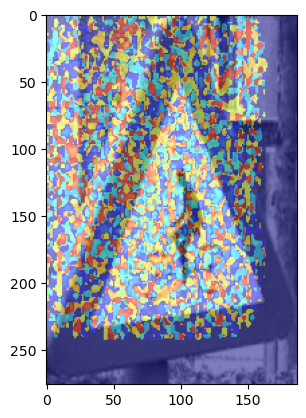

In [24]:
# Here's the part of the code dedicated to guided backpropagation 

def guided_relu(x):

    # The aim is to modify the ReLu function to make it focus on the center of the image 
    # We do this by amplifying the gradients in a circle around the center of the image 

    # Compute the gradient of the output with respect to the input
    grad_y = gradients(sum(square(x)), x)[0]
    
    # Compute the mask as a Gaussian function centered on the input shape
    mask = variable(get_center_mask(x.shape, r=10, sigma=0.5))
    
    # Emphasize the pixels at the center of the image
    mask = pow(mask, 2)
    
    # Apply the mask to the gradient
    grad_y = grad_y * mask
    
    # Set negative gradients to zero
    grad_y = switch(grad_y > 0, grad_y, 0)
    
    # Set positive gradients to their original value
    grad_y *= cast(greater(x, 0), floatx())
    
    # Apply the guided ReLU activation function
    return relu(x) * grad_y

#-----------------------------------------------------------------------------

def get_center_mask(shape, r=20, sigma=0.5):

    # Create a Gaussian mask with a circular region of interest (ROI) around the center of the input shape.

    center = tuple(dim // 2 for dim in shape)
    coords = meshgrid(*[arange(dim) for dim in shape])
    dists = sqrt(sum([(coord - c) ** 2 for coord, c in zip(coords, center)]))
    mask = zeros(shape)
    mask[dists <= r] = 1
    mask = GaussianBlur(mask, (0, 0), sigma)
    mask = float32(mask / max(mask))
    return mask

#-----------------------------------------------------------------------------

# Replace all ReLU activations in your model with guided ReLU

for layer in model.layers:
    if isinstance(layer, ReLU):
        layer.activation = guided_relu 

#-----------------------------------------------------------------------------

# Here's a visualisation of this new method on an example 
# We will put the heatmap on the grayscaled image to see the regions of focus 

NAME = "exemple.jpg"

def prep_input(path):
    image = pil_open(path)

    preprocess = Compose([
    Resize(resol),
    CenterCrop(resol),
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),])

    image = preprocess(image)
    image.unsqueeze_(0)

    image = image.permute(0, 2, 3, 1)

    # Convert to NumPy array
    image = image.numpy()

    # Convert to TensorFlow tensor
    image = convert_to_tensor(image)

    return image

#-----------------------------------------------------------------------------

# Obtain the model's output for a given input image

input_image = prep_input(NAME)

output = model.predict(input_image)

#-----------------------------------------------------------------------------

# Some transformation to go from tensor to image (generated with ChatGPT) 
with GradientTape() as tape:
    tape.watch(input_image)
    preds = model(input_image)
    top_pred_index = tf_argmax(preds, axis=1)[0]
    top_class_channel = preds[:, top_pred_index]

grads = tape.gradient(top_class_channel, input_image)[0]
guided_grads = grads.numpy()
heatmap = multiply(guided_grads, input_image.numpy())[0]

#-----------------------------------------------------------------------------

# Convert input image to grayscale
gray_img = cvtColor(array(pil_open(NAME)), COLOR_RGB2GRAY)
gray_img = cvtColor(gray_img, COLOR_GRAY2RGB)

# Normalize heatmap
heatmap /= max(heatmap)

# Resize heatmap to match the size of the grayscale input image
heatmap = resize(heatmap, (gray_img.shape[1], gray_img.shape[0]))

# Apply heatmap on grayscale image
heatmap = uint8(255 * heatmap)
heatmap = applyColorMap(heatmap, COLORMAP_JET)
overlayed_img = addWeighted(gray_img, 0.5, heatmap, 0.5, 0)

# Display the overlayed image
plt_imshow(cvtColor(overlayed_img, COLOR_BGR2RGB))
show()

In [27]:
# We train here the model 
# We don't use the callbacks anymore because the assistant told that it wasn't a good idea 
# Except for the tensorboard visualisation
# See this page for more details : https://www.tensorflow.org/tensorboard/graphs?hl=fr

#-----------------------------------------------------------------------------

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

#-----------------------------------------------------------------------------

# This will stop training if we reach 98% accuracy (doesn't work very well in practise)
class haltCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') >= 0.98):
            print("\n\n\nReached 0.98 val accuracy so cancelling training!\n\n\n")
            self.model.stop_training = True

#-----------------------------------------------------------------------------

# Some other callbacks defined previously to stop the training earlier (not used finally)
trainingStopCallback = haltCallback()
mycallbacks = [EarlyStopping(monitor='val_accuracy', restore_best_weights = True)]

#-----------------------------------------------------------------------------

eps = 10 # The number of time we want the model to train on the entire training_set

anc = model.fit(X_train_new_erase, y_train_tc, validation_data=(X_test, y_test_tc), epochs=eps, callbacks=[tensorboard_callback])

Epoch 1/10
724/724 [==============================] - 340s 457ms/step - loss: 1.6858 - accuracy: 0.5502 - val_loss: 0.2965 - val_accuracy: 0.9256
Epoch 2/10
724/724 [==============================] - 299s 413ms/step - loss: 0.3990 - accuracy: 0.8774 - val_loss: 0.1509 - val_accuracy: 0.9594
Epoch 3/10
724/724 [==============================] - 296s 409ms/step - loss: 0.2604 - accuracy: 0.9198 - val_loss: 0.1187 - val_accuracy: 0.9667
Epoch 4/10
724/724 [==============================] - 307s 424ms/step - loss: 0.2013 - accuracy: 0.9382 - val_loss: 0.0999 - val_accuracy: 0.9707
Epoch 5/10
724/724 [==============================] - 297s 410ms/step - loss: 0.1686 - accuracy: 0.9477 - val_loss: 0.0901 - val_accuracy: 0.9735
Epoch 6/10
724/724 [==============================] - 293s 404ms/step - loss: 0.1472 - accuracy: 0.9545 - val_loss: 0.0848 - val_accuracy: 0.9803
Epoch 7/10
724/724 [==============================] - 294s 407ms/step - loss: 0.1283 - accuracy: 0.9611 - val_loss: 0.0863 -

In [84]:
# Load the TensorBoard notebook extension.
# This will provide a visual representation of our CNN
%load_ext tensorboard


In [85]:
print("TensorFlow version: ", __version__)
assert version.parse(__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."

TensorFlow version:  2.12.0


In [86]:
import tensorboard
tensorboard.__version__

'2.12.2'

In [87]:
%tensorboard --logdir logs

<font size=6  color= 'white' > <b> Phase 5 : Analysis of performances </b> <br>

The aim of this part is to analyse the results of the model based on the testing set available 

In [28]:
# Here are the names of the sign 

label_names = __builtins__.open("dict.csv", "r").read().strip().split("\n")[0:]
label_names = [l.split(",")[1] for l in label_names]

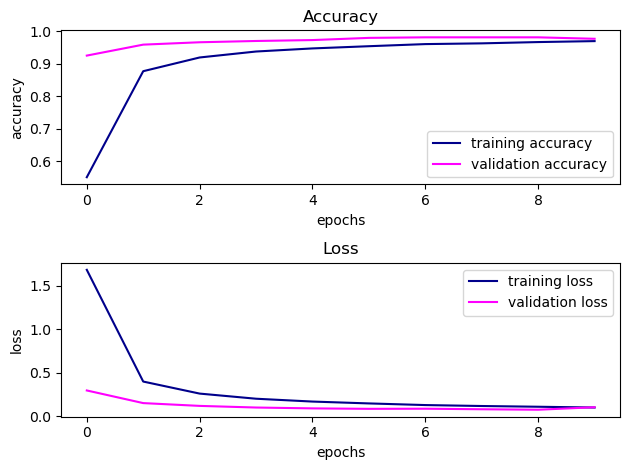

In [29]:
def perf(anc) : 

    # Plot of performances of the model on the training sets 

    figure()

    subplot(2, 1, 1)
    plot(anc.history['accuracy'], label='training accuracy', color = 'darkblue')
    plot(anc.history['val_accuracy'], label='validation accuracy', color = 'magenta')
    title('Accuracy')
    xlabel('epochs')
    ylabel('accuracy')
    legend()

    subplot(2, 1, 2)
    plot(anc.history['loss'], label='training loss', color = 'darkblue')
    plot(anc.history['val_loss'], label='validation loss', color = 'magenta')
    title('Loss')
    xlabel('epochs')
    ylabel('loss')
    legend()

    tight_layout()
    show()

#-----------------------------------------------------------------------------

perf(anc) 

In [30]:
y_sigmoid = model.predict(X_test)
y_pred = argmax(y_sigmoid, axis=1)

confusion_matrix(y_test, y_pred)

# (i,j) = number of elements from the class i classed as from the class j

56/56 [==============================] - 5s 81ms/step


array([[ 5,  0,  0, ...,  0,  0,  0],
       [ 0, 41,  0, ...,  0,  0,  0],
       [ 0,  0,  7, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 15,  0,  0],
       [ 0,  0,  0, ...,  0,  7,  1],
       [ 0,  0,  0, ...,  0,  0, 91]], dtype=int64)

In [31]:
def ratio_kaggle (y_test_tc, X_test, model) :

    # Here's a function that will give the score that we can see on kaggle based on the testing dataset 

    true = y_test_tc.argmax(axis=1)

    print("True codes : ", true)
    print("Number of codes : ", len(true))

    predict = model.predict(X_test).argmax(axis=1)

    print("Predictions : ", predict)
    print("Number of predictions : ", len(predict))

    right = 0 

    for i in range(len(true)) : 
        if predict[i] == true[i] :  
            right += 1 

    print("Number of right : ", right)
    print("Number of elements : ", len(true))

    print("Ratio : ", right/len(true))

#-----------------------------------------------------------------------------

ratio_kaggle(y_test_tc, X_test, model)

True codes :  [51 57 36 ... 19 15 44]
Number of codes :  1774
56/56 [==============================] - 5s 86ms/step
Predictions :  [51 57 36 ... 19 15 44]
Number of predictions :  1774
Number of right :  1734
Number of elements :  1774
Ratio :  0.9774520856820744


In [32]:
def network (model, y_test_tc, X_test, label_names, nbr_class) : 

    # Evaluate the network
    # This displays the precision and recall on each type of sign 

    print("[INFO] evaluating network...")
    predictions = model.predict(X_test) 
    print(classification_report(y_test_tc.copy().argmax(axis=1),
        predictions.argmax(axis=1), target_names=label_names, labels=range(nbr_class)))

#-----------------------------------------------------------------------------

filterwarnings('ignore')

network(model, y_test_tc, X_test, label_names, nbr_class)

[INFO] evaluating network...
56/56 [==============================] - 5s 84ms/step
                                 precision    recall  f1-score   support

               "uneven_surface"       1.00      1.00      1.00         5
                         "bump"       1.00      1.00      1.00        41
                     "slippery"       1.00      0.88      0.93         8
                   "left_curve"       1.00      1.00      1.00         7
                  "right_curve"       0.83      1.00      0.91         5
                  "left_curves"       1.00      1.00      1.00         2
                 "right_curves"       1.00      1.00      1.00         4
                     "children"       0.99      0.99      0.99        67
                      "cyclist"       1.00      1.00      1.00        10
                      "animals"       1.00      1.00      1.00         4
                    "roadworks"       1.00      1.00      1.00         9
              "traffic_signals"       0.

<font size=6  color= 'white' > <b> Phase 6 : Generating csv for kaggle </b> <br>

The aim of this part is to predict on the 1st kaggle dataset and generate a csv 

In [108]:
# We want to visualize the images in the set 

folder_dir = "challenge_1/eval_kaggle1"
dest = "visu/challenge1"

if not exists(dest) : 
    makedirs(dest)

to_jpeg(folder_dir, dest)

In [109]:
def Store(path, resol) : 

    # We store all of the images from the kaggle folder in an array using PIL package 
    # recall that target has been defined above 

    images = [] 
    names = []

    # get the path/directory
    folder_dir = path

    for image in listdir(folder_dir):
        # check if the image ends with ppm
        if image.endswith(".ppm") or image.endswith(".jpg") or image.endswith(".jp2"):
            img = pil_open(folder_dir + '/' + image)
            img = img.resize((resol, resol)) # (30,30) as an example 
            img = asarray(img)
            images.append(img) 
            names.append(image.replace('.ppm','').replace('.jpeg','').replace('.jp2','').replace('.jpg',''))

    images = array(images)

    print("Number of images and their resolution in the kaggle dataset : ", images.shape)

    return images, names

#-----------------------------------------------------------------------------

images, names = Store('challenge_1/eval_kaggle1', resol)
print(images.shape)

Number of images and their resolution in the kaggle dataset :  (202, 64, 64, 3)
(202, 64, 64, 3)


In [110]:
# We print there the predictions for the dataset of kaggle 

print("[INFO] evaluating network...")

predictions = model.predict(images).argmax(axis=1)
print(predictions)

[INFO] evaluating network...
7/7 [==============================] - 1s 87ms/step
[ 8 45 25 61 19 20 21 10 22 31 45 40 37 22  8 30 36 51 40 59 39 13 28 21
 21 20 59  9  9 22  3 19 21 25 59 37 10 14 18 28 23 10 28 12 61  9 28  1
 58 56 56 31 22 61  8 38 28  7 20 36 28 19 17 25 41 38 24 38 41 61 17 61
 46 28  9 10 48  9 25 46 17 28 12 28 22 28 27 54 28 13 34 14 21 10  9 25
 51  7 38 18 28  8 35 38 30 22 59  4 46 59 19 18 34 27 35 36  4 15  1  9
 30 13 45  4 32 25 17 34 15 60 36 32  3 46 27 54 51 34 49 24 29  4 25 39
 45 25 56 44 16 32 30 38 39 40 34 38 29 56  7 10 13 56 17 12 39 13 31 54
  0  9 46 35 30 36 41  3 15 34  7 28  0  3 40 14 40 13 30 46 38  6  1 54
 28 13 51 28  4 24 31 56 30 56]


In [111]:
# We will store the data in dict.csv in a dict 

data = {}

with open('dict.csv', 'r') as f:
    d_reader = DictReader(f, fieldnames=["num", "sign"])

    #get fieldnames from DictReader object and store in list
    for row in d_reader:
        data[row['num']] = row['sign']

In [112]:
# Here is the code to write the results in a CSV for kaggle 

with open('kaggle1.csv', 'w', newline='') as csvfile:
    fieldnames = ['Id', 'Category']
    writer = DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(len(predictions)): 
        writer.writerow({'Id' : names[i], 'Category' : predictions[i]})

In [113]:
# We can visualize the classification made on the kaggle 1st dataset 

for i in range (len(images)): 
    sign = data[str(predictions[i])]
    if not exists("challenge_1/results" + "/" + str(predictions[i]) + "_" + label_names[predictions[i]].replace('"', "")):
        makedirs("challenge_1/results" + "/" + str(predictions[i]) + "_" + label_names[predictions[i]].replace('"', ""))
    imwrite("challenge_1/results" + "/" + str(predictions[i]) + "_" + label_names[predictions[i]].replace('"', "") + "/" + str(i) + "_" + str(sign) + '.jpeg', cvtColor(images[i], COLOR_RGB2BGR))

<font size=6  color= 'white' > <b> Phase 7 : Generating csv for kaggle </b> <br>

The aim of this part is to predict on the 3rd kaggle dataset and generate a csv 

In [114]:
images, names = Store('challenge_3/eval_kaggle3', resol)
print(images.shape)

Number of images and their resolution in the kaggle dataset :  (191, 64, 64, 3)
(191, 64, 64, 3)


In [115]:
# We print there the predictions for the dataset of kaggle 

print("[INFO] evaluating network...")

predictions = model.predict(images).argmax(axis=1)
print(predictions)

[INFO] evaluating network...
6/6 [==============================] - 1s 112ms/step
[32 43 19 41 40 21 43 32 19 45 19 28 45 28 29 29 29 41 35 40 28 19 32 19
 30 29 19 29 32 40 38 41 32  1  1 32  1  1 31 28 21 38 32 45 30 29  1 13
 32 30 31 31 19 21 27 45 28  7 40 40 32 29 43 19 45 28 29 20 19 40  1 40
  1  1 38 40 19 21 32 31 13 29 32 19 40 31 28 20 32 29 40 40 41 21 40 32
 28 43 32 32 41  1 45 19 32 30  1 40 32 30 46 20 19 20 32 28 31 28 45 32
 31 40  1 45 31  1 28 19 38 20 40  1 30 38 32 43 29 28 19 30 21  1  1 21
 43 40 38 24 45 28 29  1 28 38 21 29 29 43 38  1 29  1 30 19 19 40 32 40
 45  1 30 19 40 30 19 19 29  7 19 27 31 32 32 28 20 28 40 29 32  1 41]


In [116]:
# We will store the data in dict.csv in a dict 

data = {}

with open('dict.csv', 'r') as f:
    d_reader = DictReader(f, fieldnames=["num", "sign"])

    #get fieldnames from DictReader object and store in list
    for row in d_reader:
        data[row['num']] = row['sign']

In [117]:
# Here is the code to write the results in a CSV for kaggle 

with open('kaggle3.csv', 'w', newline='') as csvfile:
    fieldnames = ['Id', 'Category']
    writer = DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(len(predictions)): 
        writer.writerow({'Id' : names[i], 'Category' : predictions[i]})

In [118]:
# We can visualize the classification made on the kaggle 1st dataset 

for i in range (len(images)): 
    sign = data[str(predictions[i])]
    if not exists("challenge_3/results" + "/" + str(predictions[i]) + "_" + label_names[predictions[i]].replace('"', "")):
        makedirs("challenge_3/results" + "/" + str(predictions[i]) + "_" + label_names[predictions[i]].replace('"', ""))
    imwrite("challenge_3/results" + "/" + str(predictions[i]) + "_" + label_names[predictions[i]].replace('"', "") + "/" + str(i) + "_" + str(sign) + '.jpeg', cvtColor(images[i], COLOR_RGB2BGR))

<font size=6  color= 'white' > <b> Phase 8 : Cropping </b> <br>

The aim of this part is to provide a code to crop the images 

In [119]:
"""
This function is used to crop the images contained in the path directory and save it in the dest directory
It also displays the cropped images
"""
def crop(path,dest):

    if exists(dest):
        system('rm -r dest')
    if not exists(dest):
        makedirs(dest)
    if not exists(path):
        print("The given directory doesn't exist")
        return 
    process(path, dest)
    #show_images(dest)
    return

"""
This function is used to display the images contained in the directory
"""
def show_images(directory):
    for filename in listdir(directory):
        f = join(directory, filename)
        # checking if it is a file
        if isfile(f):
            print(f)
            if f.endswith('.ppm') or f.endswith('.jpeg') or f.endswith('.jp2'):
                imshow('image', imread(f))
                waitKey()
    return

"""
This function is used to process the images contained in the path directory and save it in the dest directory
"""
def process(path, dest):

    directory = path
    for filename in listdir(directory):
        f = join(directory, filename)
        if not isfile(f):
            print("Expected the directory to contain only files") 
        if isfile(f):
            if filename.endswith('.ppm') or filename.endswith('.jpeg') or filename.endswith('.jp2'):

    #----------------------------------------------------------------------------------------------------------

                raw_image = imread(f) # Charge l'image
                process_image = raw_image.copy() # Copie l'image
                # Recherche de contour basé sur la forme et passe à l'image suivante si un contour est trouvé
                if(process_shape(raw_image, dest, filename)):
                    continue
    
    #----------------------------------------------------------------------------------------------------------

                # Floute avec du gaussian puis du median blur
                blur = GaussianBlur(process_image, (9,9), 0)
                blur = medianBlur(blur, 9)          

                # Transforme l'image en image HSV
                img_hsv = cvtColor(blur, COLOR_BGR2HSV)

                # Augmente la saturation
                img_hsv[...,1] = img_hsv[...,1]*1.4

    #----------------------------------------------------------------------------------------------------------
                # Crée des masques de couleur pour les différents couleur des panneaux routiers(rouge, bleu et orange)

                # Masque rouge pour les valeurs basses en HSV
                lower_red = array([0, 50, 50])
                upper_red = array([10, 255, 255])
                mask_temp = inRange(img_hsv, lower_red, upper_red)
                # Masque rouge valeurs hautes
                lower_red = array([170, 70, 50])
                upper_red = array([180, 255, 255])
                mask_red = inRange(img_hsv.copy(), lower_red, upper_red)
                # Combine les valeurs basses et hautes du rouge
                mask_red = bitwise_or(mask_temp, mask_red)

                # Masque orange
                lower_orange = array([5, 150, 150])
                upper_orange = array([20, 250, 255])
                mask_orange = inRange(img_hsv.copy(), lower_orange, upper_orange)

                # Masque bleu
                lower_blue = array([90, 100, 100])
                upper_blue = array([121, 255, 255])
                mask_blue = inRange(img_hsv.copy(), lower_blue, upper_blue)
    
    #----------------------------------------------------------------------------------------------------------

                # Trouver les contours dans les différents filtres de couleur
                contours_orange, _ = findContours(mask_orange, RETR_EXTERNAL, CHAIN_APPROX_SIMPLE)
                contours_red, _ = findContours(mask_red, RETR_EXTERNAL, CHAIN_APPROX_SIMPLE)
                contours_blue, _ = findContours(mask_blue, RETR_EXTERNAL, CHAIN_APPROX_SIMPLE)
                contours = contours_orange + contours_red + contours_blue

    #----------------------------------------------------------------------------------------------------------

                # Initialise une liste vide pour stocker les contours valides
                list_contour = []
                best_contour = None

                # Parcourt tous les contours trouvés
                for cnt in contours:
                    # Calcule le rectangle englobant le contour (bounding box)
                    x, y, w, h = boundingRect(cnt)

                    # Impose que la bounding box autour du contour soit plus grand que 5% de l'image 
                    if (w*h) < (0.001*raw_image.shape[0]*raw_image.shape[1]):
                        continue

                    # Impose que la bounding box ne soit pas un rectangle très plat
                    if (w/h) < 0.7 or (w/h) > 1.3:
                        continue

                    # Si le contour est un cercle, alors c'est très probablement un panneau
                    area = contourArea(cnt)
                    perimeter = arcLength(cnt, True)
                    try:
                        circularity = 4 * pi * area / perimeter ** 2
                        if circularity > 0.8:
                            best_contour = cnt
                            list_contour.append(cnt)
                            break
                    except: 
                        pass 
                    # On regarde si l'aire du plus petit contour convexe autour du contour est proche de l'aire du contour
                    try:
                        hull = convexHull(cnt)
                        hull_area = contourArea(hull)
                        solidity = float(area)/hull_area
                        if solidity < 0.7:
                            continue
                    except: 
                        continue
                    # Si le contour correspond aux critères, on le garde
                    list_contour.append(cnt)

                #----------------------------------------------------------------------------------------------------------
                # Si aucun contour correspondant à nos critères n'a été trouvé
                if(len(list_contour) == 0):  
                    imwrite(dest+"/"+filename, raw_image)
                    continue
                    
                # Si aucun cerle n'a été trouvé, on prends le contour répondant au critères ayant la plus grande aire
                if(best_contour is None):
                    #get max of list_contour
                    best_contour = MAX(list_contour, key=lambda x: contourArea(x))

                #----------------------------------------------------------------------------------------------------------

                # Crop l'image sur la bounding box autour du contour choisi
                (x,y,w,h) = boundingRect(best_contour)
                if(x-int(w/10) > 0 and y-int(h/10) > 0 and x + w+int(w/10) < raw_image.shape[1] and y + h+int(h/10) < raw_image.shape[0] ):
                    raw_image = raw_image[y-int(h/10):y + h+int(h/10), x-int(w/10):x + w+int(w/10)]
                    # Ecrit l'image croppée dans un dossier
                    imwrite(dest+"/"+filename, raw_image)
                else: 
                    raw_image = raw_image[y:y + h, x:x + w]
                    # Ecrit l'image croppée dans un dossier
                    imwrite(dest+"/"+filename, raw_image)
            

    return 


def process_shape(raw_image, dest, filename):

    process_image = raw_image.copy()
    # Transforme l'image afin de détecter les contours
    
    # Converti l'image en HSV
    hsv = cvtColor(process_image, COLOR_BGR2HSV)
    # Retire la saturation et couleurs trop sombres
    lower_sat = array([50, 50, 50])
    upper_sat = array([255, 255, 255])
    mask = inRange(hsv, lower_sat, upper_sat)
    # Applique le masque pour retirer la saturation
    masked_image = bitwise_and(process_image, process_image, mask=mask)

    #----------------------------------------------------------------------------------------------------------

    # Aplication d'un filtre gris
    gray = cvtColor(masked_image, COLOR_BGR2GRAY)
    # Application d'un floutage
    bilateral_filtered_image = GaussianBlur(gray,(3,3),0)
    # Détection des changements de couleurs sur l'images
    edge_detected_image = Canny(bilateral_filtered_image, 90, 170)

    #----------------------------------------------------------------------------------------------------------

    # Trouve les contours dans l'image et les trier par aire et garder les 20 plus grands
    contours = findContours(edge_detected_image.copy(), RETR_TREE, CHAIN_APPROX_SIMPLE)
    contours = grab_contours(contours)
    contours = sorted(contours, key=contourArea, reverse=True)[:20]

    shapes = []
    # Itére sur chaque contour
    for contour in contours:

        length = arcLength(contour,True)
        approx = approxPolyDP(contour,0.01*length, True)
        area = contourArea(contour)
        perimeter = arcLength(contour, True)
        if(perimeter == 0):
            continue
        circularity = 4 * pi * area / perimeter ** 2
        if circularity < 0.8:
            continue
        # Regarde si le l'approximation du contour est convexe
        if not isContourConvex(approx):
            continue
        # Si l'approximation a 3 côtés, ça doit être un panneau triangulaire
        if len(approx) == 3:
            shapes.append(contour)
        # Si l'approximation a 4 côtés, on vérifie que le rapport longueur sur largeur est proche de 1
        elif len(approx) == 4:
            (x, y, w, h) = boundingRect(approx)
            ar = w / float(h)
            if (ar >= 0.8 and ar <= 1.2):
                shapes.append(contour)
            else:
                continue
        # Si l'approximation a 8 côtés, ça doit être un panneau STOP octogonal
        elif len(approx) == 8:
            shapes.append(contour)
        # Sinon, si le rapport entre l'aire du contour et l'aire du plus petit cercle entourant le contour est proche de 1
        elif len(approx) > 8:
            (x, y), radius = minEnclosingCircle(contour)
            area = contourArea(contour)
            if radius > 0 and area / (pi * radius**2) >= 0.8:
                shapes.append(contour)
        # Sinon passe au contour suivant
        else:
            continue

    #----------------------------------------------------------------------------------------------------------

    # Garde le contour avec la plus grande aire
    try:
        best_contour = MAX(shapes, key=lambda x: contourArea(x))
    except ValueError:
        best_contour = None
    if best_contour is None:
        # Aucun contour correct trouvé
        return False
    
    # Crop l'image sur la bounding box autour du contour choisi
    (x,y,w,h) = boundingRect(best_contour)
    if(x-int(w/10) > 0 and y-int(h/10) > 0 and x + w+int(w/10) < raw_image.shape[1] and y + h+int(h/10) < raw_image.shape[0] ):
        raw_image = raw_image[y-int(h/10):y + h+int(h/10), x-int(w/10):x + w+int(w/10)]
        # Ecrit l'image croppée dans un dossier
        imwrite(dest+"/"+filename, raw_image)
    else: 
        raw_image = raw_image[y:y + h, x:x + w]
        # Ecrit l'image croppée dans un dossier
        imwrite(dest+"/"+filename, raw_image)
    return True
    
def main():
    crop('challenge_2/eval_kaggle2', 'challenge_2/result_cropped_eval2')
    return
if __name__ == "__main__":
    main()

<font size=6  color= 'white' > <b> Phase 9 : Generating csv for kaggle </b> <br>

The aim of this part is to predict on the 2nd kaggle dataset and generate a csv 

In [120]:
# We want to visualize the images in the set 

folder_dir = 'challenge_2/result_cropped_eval2'
dest = "visu/challenge2"

if not exists(dest) : 
    makedirs(dest)

to_jpeg(folder_dir, dest)

In [121]:
images, names = Store('challenge_2/result_cropped_eval2', resol)
print(images.shape)

Number of images and their resolution in the kaggle dataset :  (66, 64, 64, 3)
(66, 64, 64, 3)


In [122]:
# We print there the predictions for the dataset of kaggle 

print("[INFO] evaluating network...")

predictions = model.predict(images).argmax(axis=1)
print(predictions)

[INFO] evaluating network...
3/3 [==============================] - 0s 69ms/step
[24 21  6 48 58 35 45 22 22 25 31 40  7  6 22 39 22  2  6 25  2 13 24 21
 40 21 21 10 53 40 13 10 19 19  7  6 35 14 17 56 19 17 13 21 46  7  4  3
 35 61 19 17 30 13 28 51 21 35 11 17 19 35  6 22 35 28]


In [123]:
# We will store the data in dict.csv in a dict 

data = {}

with open('dict.csv', 'r') as f:
    d_reader = DictReader(f, fieldnames=["num", "sign"])

    #get fieldnames from DictReader object and store in list
    for row in d_reader:
        data[row['num']] = row['sign']

In [124]:
# Here is the code to write the results in a CSV for kaggle 

with open('kaggle2.csv', 'w', newline='') as csvfile:
    fieldnames = ['Id', 'Category']
    writer = DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(len(predictions)): 
        writer.writerow({'Id' : names[i], 'Category' : predictions[i]})

In [125]:
# We can visualize the classification made on the kaggle 1st dataset 

for i in range (len(images)): 
    sign = data[str(predictions[i])]
    if not exists("challenge_2/results" + "/" + str(predictions[i]) + "_" + label_names[predictions[i]].replace('"', "")):
        makedirs("challenge_2/results" + "/" + str(predictions[i]) + "_" + label_names[predictions[i]].replace('"', ""))
    imwrite("challenge_2/results" + "/" + str(predictions[i]) + "_" + label_names[predictions[i]].replace('"', "") + "/" + str(i) + "_" + str(sign) + '.jpeg', cvtColor(images[i], COLOR_RGB2BGR))